In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv('train_and_test2.csv')
raw_data

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [28]:
data = raw_data.copy()
data = data.drop(['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18','Embarked'], axis=1)
data

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,2urvived
0,1,22.0,7.2500,0,1,0,3,0
1,2,38.0,71.2833,1,1,0,1,1
2,3,26.0,7.9250,1,0,0,3,1
3,4,35.0,53.1000,1,1,0,1,1
4,5,35.0,8.0500,0,0,0,3,0
...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,0
1305,1306,39.0,108.9000,1,0,0,1,0
1306,1307,38.5,7.2500,0,0,0,3,0
1307,1308,28.0,8.0500,0,0,0,3,0


In [29]:
data = data.drop(['Passengerid'], axis=1)
data

,Age,Fare,Sex,sibsp,Parch,Pclass,2urvived
0,22.0,7.2500,0,1,0,3,0
1,38.0,71.2833,1,1,0,1,1
2,26.0,7.9250,1,0,0,3,1
3,35.0,53.1000,1,1,0,1,1
4,35.0,8.0500,0,0,0,3,0
...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,0
1305,39.0,108.9000,1,0,0,1,0
1306,38.5,7.2500,0,0,0,3,0
1307,28.0,8.0500,0,0,0,3,0


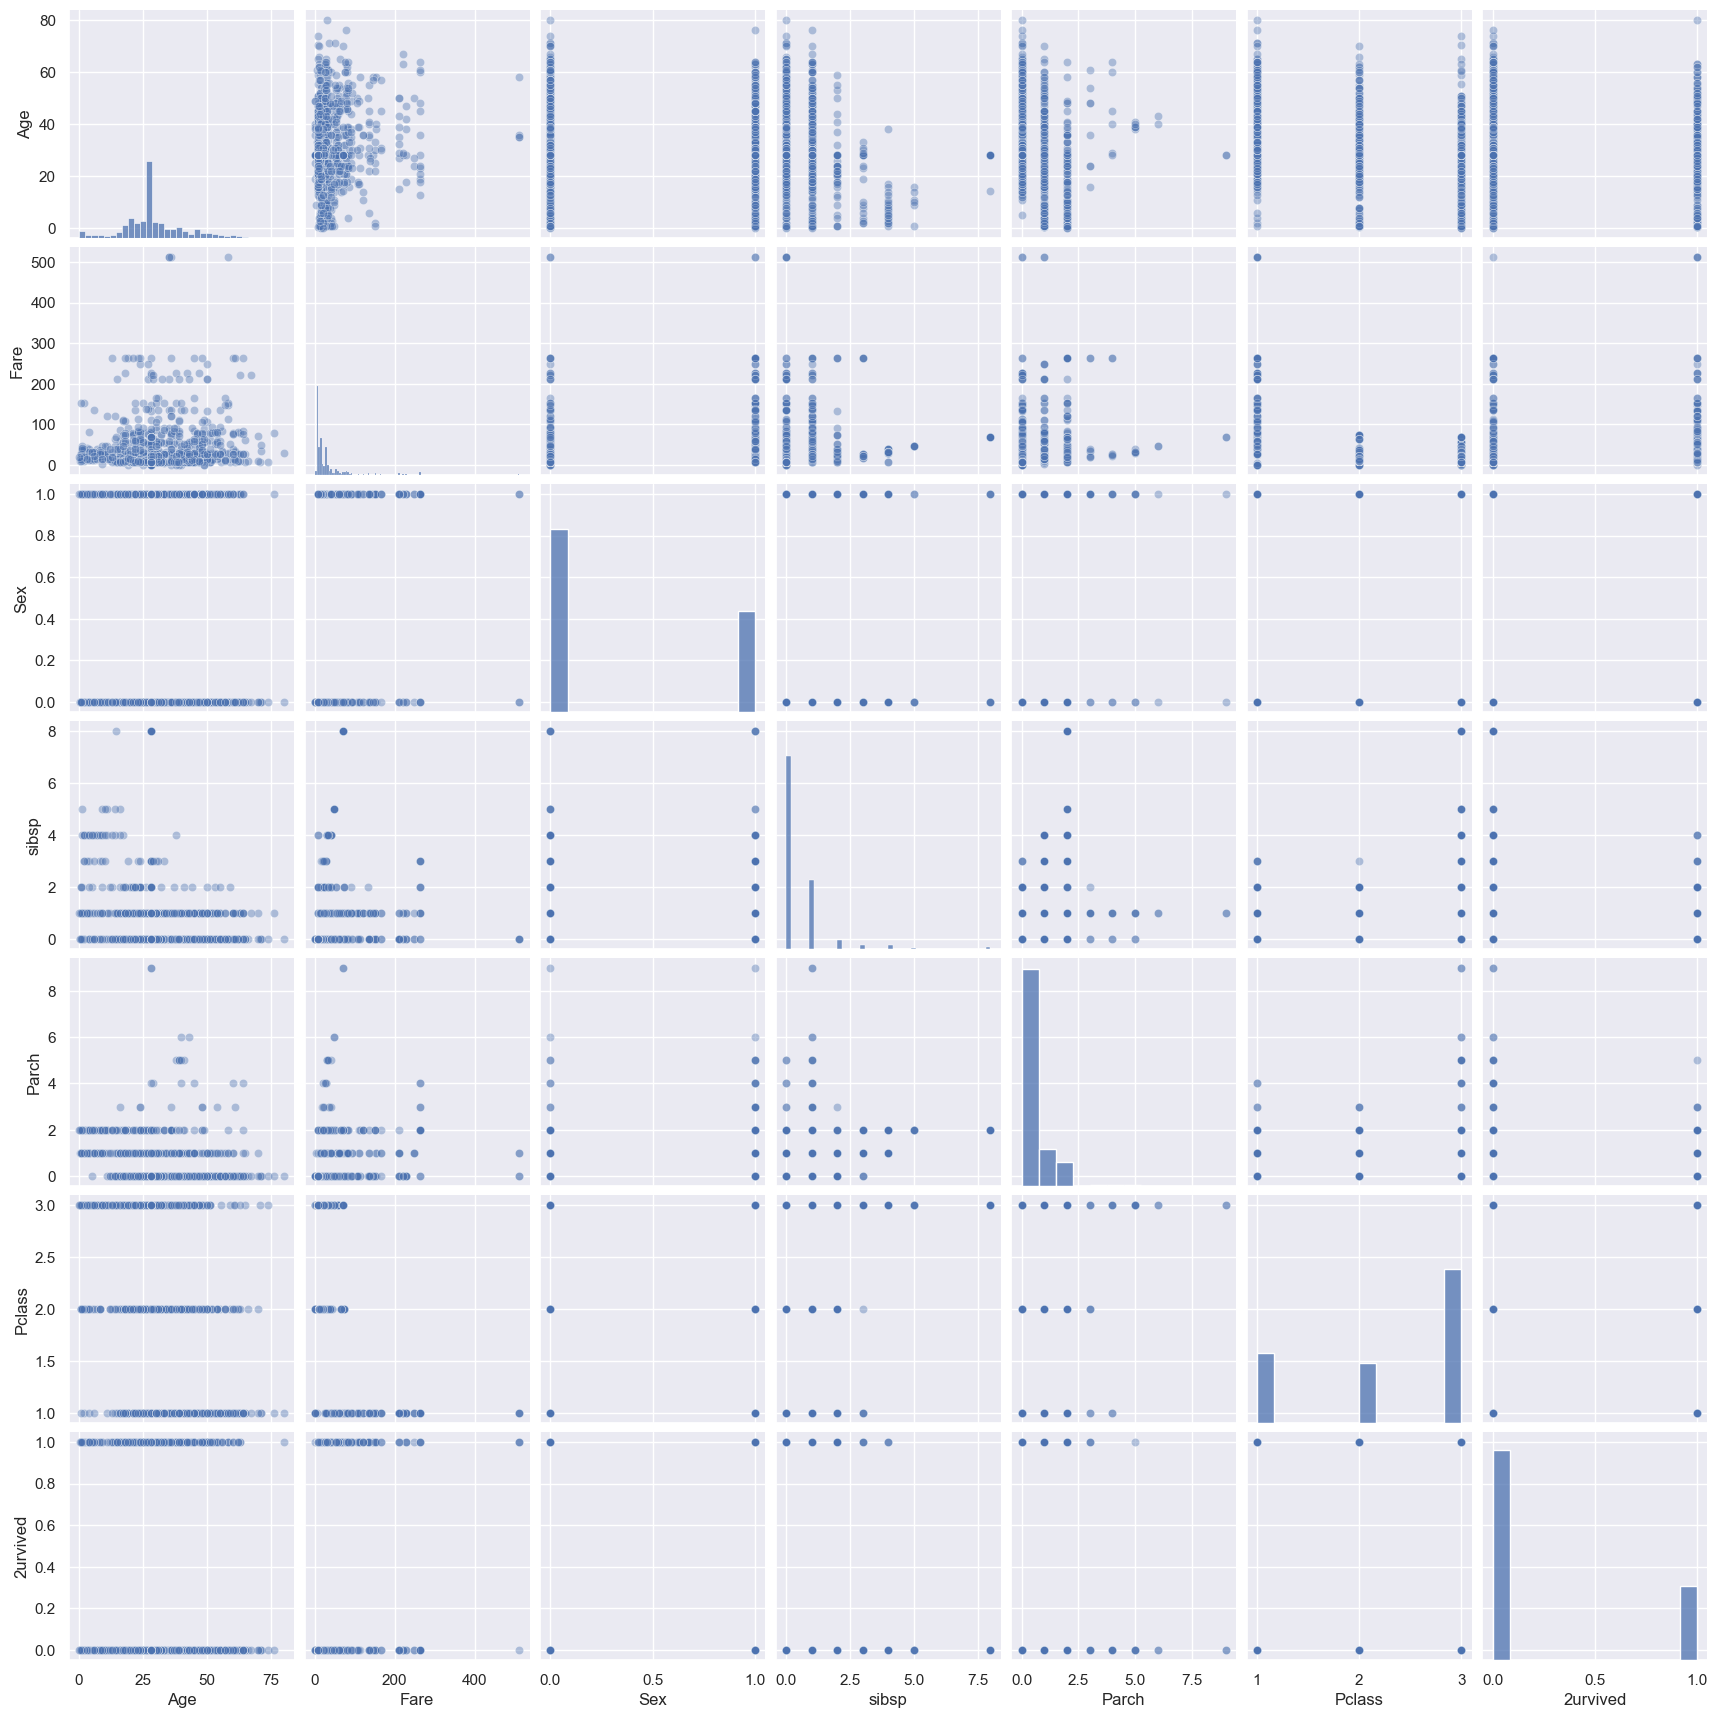

In [30]:
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.4})

In [31]:
data['Fare'].sort_values(ascending=False)

737     512.3292
1234    512.3292
258     512.3292
679     512.3292
438     263.0000
          ...   
277       0.0000
815       0.0000
302       0.0000
806       0.0000
263       0.0000
Name: Fare, Length: 1309, dtype: float64

In [32]:
data = data[data['Fare']<=500]
data['Fare'].sort_values(ascending=False)

438     263.0
341     263.0
944     263.0
88      263.0
960     263.0
        ...  
597       0.0
481       0.0
466       0.0
413       0.0
1157      0.0
Name: Fare, Length: 1305, dtype: float64

(array([893., 196.,  94.,  42.,  17.,  25.,   4.,   0.,  18.,  16.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <BarContainer object of 10 artists>)

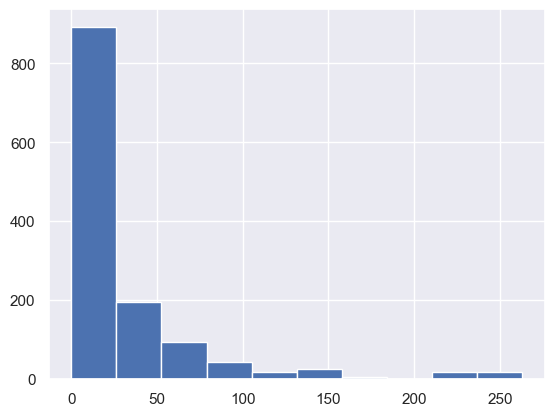

In [33]:
plt.hist(data['Fare'])

In [34]:
data.describe()
data = data.dropna()

In [35]:
data.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,2urvived
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,29.467946,31.812739,0.355556,0.500383,0.384674,2.298851,0.259770
std,12.897806,44.489203,0.478865,1.042888,0.866421,0.836040,0.438676
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,0.000000
75%,35.000000,31.000000,1.000000,1.000000,0.000000,3.000000,1.000000
max,80.000000,263.000000,1.000000,8.000000,9.000000,3.000000,1.000000


In [36]:
X = data.drop(['2urvived'], axis=1)
y = data['2urvived']

In [37]:
X.head()

,Age,Fare,Sex,sibsp,Parch,Pclass
0,22.0,7.2500,0,1,0,3
1,38.0,71.2833,1,1,0,1
2,26.0,7.9250,1,0,0,3
3,35.0,53.1000,1,1,0,1
4,35.0,8.0500,0,0,0,3


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [41]:
model.score(X_test,y_test)

0.8045977011494253

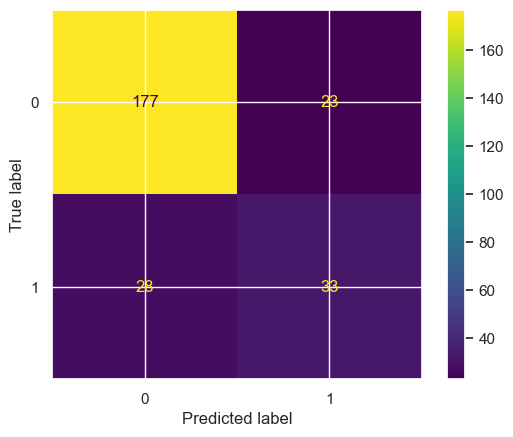

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [45]:
from sklearn.metrics import accuracy_score, classification_report


y_predict = model.predict(X_test)
print('The accuracy of the model is ', accuracy_score(y_test,y_predict))
print('Classification report: \n', classification_report(y_test, y_predict))

The accuracy of the model is  0.8045977011494253
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       200
           1       0.59      0.54      0.56        61

    accuracy                           0.80       261
   macro avg       0.73      0.71      0.72       261
weighted avg       0.80      0.80      0.80       261

